In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-salaries-in-ai-ml-data-science/salaries.json
/kaggle/input/global-salaries-in-ai-ml-data-science/salaries.csv


#### Data Loading and Cleaning

In [2]:
# Read the data and show the number of datapoints and a preview
csv_file = '/kaggle/input/global-salaries-in-ai-ml-data-science/salaries.csv'
df = pd.read_csv(csv_file)
display(df.shape)
df.head(1)

(8805, 11)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M


In [3]:
# get the general overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8805 non-null   int64 
 1   experience_level    8805 non-null   object
 2   employment_type     8805 non-null   object
 3   job_title           8805 non-null   object
 4   salary              8805 non-null   int64 
 5   salary_currency     8805 non-null   object
 6   salary_in_usd       8805 non-null   int64 
 7   employee_residence  8805 non-null   object
 8   remote_ratio        8805 non-null   int64 
 9   company_location    8805 non-null   object
 10  company_size        8805 non-null   object
dtypes: int64(4), object(7)
memory usage: 756.8+ KB


In [4]:
# check for nulls
display(df.isna().any().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

0

In [5]:
# convert objects to category data type
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].astype('category')

In [6]:
# number of unique values in the categories
for col in df.columns:
    if df[col].dtype == 'category':
        print(f"\t {col} >> {df[col].nunique()} {col.split('_')[-1]}s")

	 experience_level >> 4 levels
	 employment_type >> 4 types
	 job_title >> 124 titles
	 salary_currency >> 22 currencys
	 employee_residence >> 86 residences
	 company_location >> 74 locations
	 company_size >> 3 sizes


In [7]:
df.tail(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8803,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
8804,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


#### Analysis

In [8]:
# util functions
def get_value_range(col: str):
    """
    params: col: str - the column name
    return: an f-string of the min and max values of the column
    """
    return f"{df[col].min()} - {df[col].max()}"

In [9]:
# year range, salary range (USD)
print(f"Years: {get_value_range('work_year')} \nSalary (USD): {get_value_range('salary_in_usd')}")

Years: 2020 - 2023 
Salary (USD): 15000 - 615201


In [10]:
# mean salaries for jobs with location
mean_salary_df = df.groupby(['job_title', 'company_location', 'company_size'])['salary_in_usd'].mean().dropna().sort_values(ascending=False).reset_index()
top_10 = mean_salary_df.head(10)
bottom_10 = mean_salary_df.tail(10)

# top 10 highest paying jobs
display(Markdown(' ### 10 highest paying jobs'))
display(top_10.T)

# bottom 10 least paying jobs
display(Markdown(' ### 10 least paying jobs'))
display(bottom_10.T)

 ### 10 highest paying jobs

,0,1,2,3,4,5,6,7,8,9
job_title,Business Intelligence Consultant,AI Scientist,Principal Data Scientist,Data Analytics Lead,Analytics Engineering Manager,Data Science Tech Lead,Finance Data Analyst,Managing Director Data Science,AI Engineer,Director of Data Science
company_location,IN,IL,US,US,GB,US,US,US,QA,US
company_size,S,L,S,L,L,L,M,L,M,L
salary_in_usd,615201.0,417937.0,416000.0,405000.0,399880.0,375000.0,323905.0,300000.0,300000.0,287500.0


 ### 10 least paying jobs

,588,589,590,591,592,593,594,595,596,597
job_title,Product Data Analyst,Data Scientist,ML Engineer,Computer Vision Engineer,Data Analyst,Data Analyst,Business Intelligence Developer,Data Analyst,Staff Data Analyst,Machine Learning Developer
company_location,IN,EC,DE,IN,IN,PH,GH,ID,CA,TH
company_size,L,L,S,M,S,L,M,L,M,L
salary_in_usd,16417.0,16000.0,15966.0,15897.0,15809.0,15680.0,15000.0,15000.0,15000.0,15000.0


There seem to a very high disparity in salaries with company location than company size.

Text(0.5, 0, 'Salary (USD)')

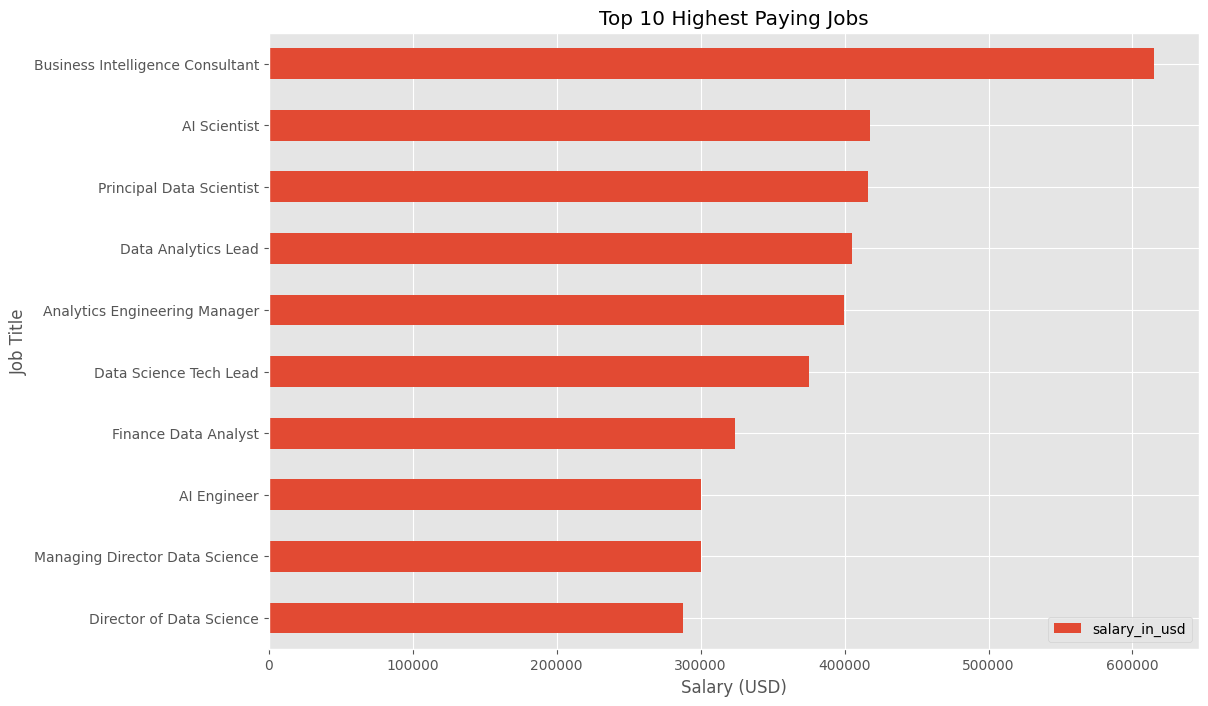

In [11]:
top_10.sort_values(by='salary_in_usd').plot(x='job_title', y='salary_in_usd', kind='barh', figsize=(12, 8))
plt.title('Top 10 Highest Paying Jobs')
plt.ylabel('Job Title')
plt.xlabel('Salary (USD)')


Text(0.5, 0, 'Salary (USD)')

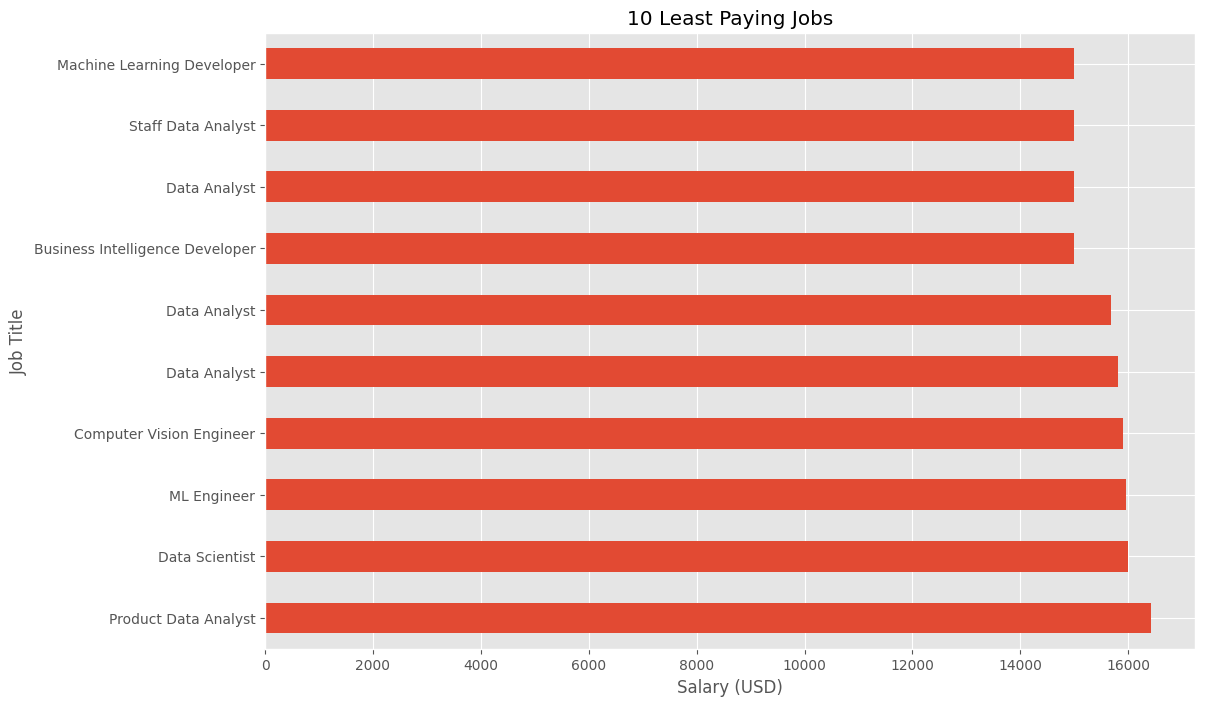

In [12]:
bottom_10.plot(x='job_title', y='salary_in_usd', kind='barh', figsize=(12, 8), legend=None)
plt.title('10 Least Paying Jobs')
plt.ylabel('Job Title')
plt.xlabel('Salary (USD)')

In [13]:
fig = go.Figure()
for location in top_10['company_location'].unique():
    location_info = top_10[top_10['company_location'] == location]
    fig.add_trace(go.Bar(
        x = location_info['job_title'],
        y = location_info['salary_in_usd'],
        name = location
    ))
fig.update_layout(
    barmode = 'group',
    xaxis = dict(tickangle=45),
    title = 'Top 10 Job Titles Salary Comparison by Location',
    xaxis_title = 'Job Title',
    yaxis_title = 'Salary (USD)'
)

Text(0.5, 0, 'Salary (USD)')

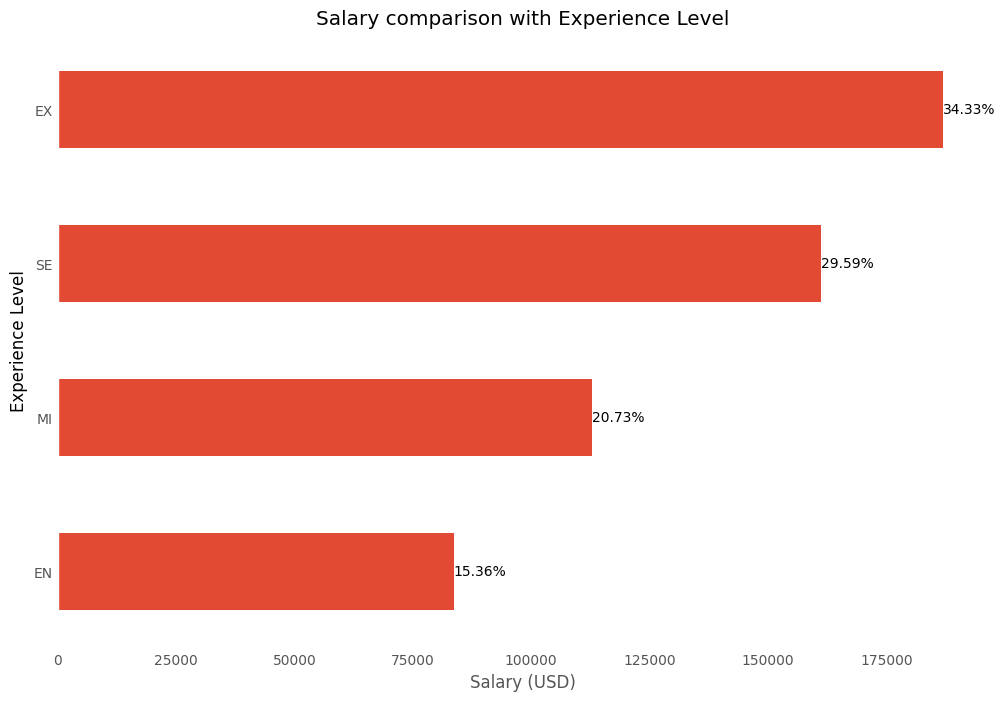

In [14]:
# experience
exp_df = df.groupby(['experience_level'])['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

ax = exp_df.sort_values(by='salary_in_usd').plot(x='experience_level', y='salary_in_usd', kind='barh', figsize=(12, 8), legend = False)
ax.tick_params(axis = 'both', which = 'both', length = 0)

total_sal = exp_df['salary_in_usd'].sum()
for idx, val in enumerate(exp_df['salary_in_usd'].sort_values()):
    percent = (val / total_sal) * 100
    ax.text(val, idx, f"{percent:.2f}%", va = 'center', fontsize = 10, color = 'black')
    
ax.set_facecolor('white')
plt.title('Salary comparison with Experience Level')
plt.ylabel('Experience Level', color = 'black')
plt.xlabel('Salary (USD)')

In [15]:
loc_df = df.groupby('company_location')['salary_in_usd'].mean().round(2).sort_values(ascending = False).reset_index()

display(Markdown('### Locations with Highest Paying Data Roles'))
display(loc_df.head(20).T)

display(Markdown('\n### Locations with Least Paying Data Roles'))
display(loc_df.tail(20).T)

### Locations with Highest Paying Data Roles

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
company_location,QA,IL,PR,US,CA,SA,NZ,AU,UA,BA,IE,JP,GB,AE,IR,DZ,IQ,MU,CN,SE
salary_in_usd,300000.0,217332.0,167500.0,157914.37,135994.98,134999.0,125000.0,121808.41,121333.33,120000.0,115188.29,110821.62,109611.11,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,98791.33



### Locations with Least Paying Data Roles

,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
company_location,KR,IN,EE,BS,CL,MY,ZA,ID,AS,PH,PK,MT,GH,HU,TH,EG,TR,HN,MD,EC
salary_in_usd,47000.0,46444.33,45993.44,45555.0,40038.0,40000.0,34482.0,34208.0,34026.5,32840.0,30000.0,28369.0,27000.0,26709.5,22971.33,22800.0,22313.6,20000.0,18000.0,16000.0
